In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#IMPORTING AND LOADING THE DATASET

**#THE DATASET IS ABOUT THE USED CAR LISTINGS FOR SALE IN CARDEKHO**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load dataset
df = pd.read_csv('/content/drive/My Drive/car_sales/Car_sale_ads.csv')


# Display shape and preview
print("Shape:", df.shape)
df.head()

Shape: (208304, 25)


,Index,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Vehicle_version,Vehicle_generation,Production_year,Mileage_km,...,Transmission,Type,Doors_number,Colour,Origin_country,First_owner,First_registration_date,Offer_publication_date,Offer_location,Features
0,0,86200,PLN,New,Abarth,595,NaN,NaN,2021,1.0,...,Manual,small_cars,3.0,gray,NaN,NaN,NaN,04/05/2021,"ul. Jubilerska 6 - 04-190 Warszawa, Mazowiecki...",[]
1,1,43500,PLN,Used,Abarth,Other,NaN,NaN,1974,59000.0,...,Manual,coupe,2.0,silver,NaN,NaN,NaN,03/05/2021,"kanonierska12 - 04-425 Warszawa, Rembertów (Po...",[]
2,2,44900,PLN,Used,Abarth,500,NaN,NaN,2018,52000.0,...,Automatic,small_cars,3.0,silver,NaN,NaN,NaN,03/05/2021,"Warszawa, Mazowieckie, Białołęka","['ABS', 'Electric front windows', 'Drivers air..."
3,3,39900,PLN,Used,Abarth,500,NaN,NaN,2012,29000.0,...,Manual,small_cars,3.0,gray,NaN,NaN,NaN,30/04/2021,"Jaworzno, Śląskie","['ABS', 'Electric front windows', 'Drivers air..."
4,4,97900,PLN,New,Abarth,595,NaN,NaN,2021,600.0,...,Manual,small_cars,3.0,blue,NaN,NaN,NaN,30/04/2021,"ul. Gorzysława 9 - 61-057 Poznań, Nowe Miasto ...","['ABS', 'Electrically adjustable mirrors', 'Pa..."


In [ ]:
# Column names
df.columns.tolist()

# Data types and non-null info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208304 entries, 0 to 208303
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    208304 non-null  int64  
 1   Price                    208304 non-null  int64  
 2   Currency                 208304 non-null  object 
 3   Condition                208304 non-null  object 
 4   Vehicle_brand            208304 non-null  object 
 5   Vehicle_model            208304 non-null  object 
 6   Vehicle_version          138082 non-null  object 
 7   Vehicle_generation       147860 non-null  object 
 8   Production_year          208304 non-null  int64  
 9   Mileage_km               207321 non-null  float64
 10  Power_HP                 207661 non-null  float64
 11  Displacement_cm3         206338 non-null  float64
 12  Fuel_type                208304 non-null  object 
 13  CO2_emissions            94047 non-null   float64
 14  Driv

In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
First_owner,143210
First_registration_date,121859
CO2_emissions,114257
Origin_country,89992
Vehicle_version,70222
Vehicle_generation,60444
Drive,15076
Displacement_cm3,1966
Doors_number,1487
Mileage_km,983


In [ ]:
df.describe()


,Index,Price,Production_year,Mileage_km,Power_HP,Displacement_cm3,CO2_emissions,Doors_number
count,208304.000000,2.083040e+05,208304.000000,2.073210e+05,207661.000000,206338.000000,9.404700e+04,206817.000000
mean,104151.500000,6.305383e+04,2012.098241,1.502768e+05,151.836281,1882.567147,3.191564e+05,4.637138
std,60132.329574,8.665967e+04,6.998414,2.937447e+06,77.683546,729.609660,7.291396e+07,0.768559
min,0.000000,5.000000e+02,1915.000000,1.000000e+00,1.000000,400.000000,1.000000e+00,1.000000
25%,52075.750000,1.780000e+04,2008.000000,5.300000e+04,105.000000,1461.000000,1.200000e+02,5.000000
50%,104151.500000,3.570000e+04,2013.000000,1.445660e+05,136.000000,1798.000000,1.400000e+02,5.000000
75%,156227.250000,7.599000e+04,2017.000000,2.060000e+05,172.000000,1997.000000,1.640000e+02,5.000000
max,208303.000000,6.999000e+06,2021.000000,1.111111e+09,1398.000000,8400.000000,2.000000e+10,55.000000


#dataset analysis & preprocessing

**First_owner**

This indicates whether the car is being sold by its first owner. However, the column has over 1.4 lakh missing values, making it unreliable and better to remove from analysis.

**First_registration_date**

Captures when the car was first registered. With more than 1.2 lakh missing entries, it's not reliable and should be dropped.

**CO2_emissions **

Represents the vehicle's carbon emissions. Though potentially useful for environmental trends, over 1.1 lakh missing values render it unsuitable for analysis.

**Origin_country**

Indicates the country of manufacture. Due to a high number of missing entries, this column can be removed unless specifically needed for regional studies.

**Vehicle_version**

Refers to variant or trim details (e.g., ZDI+, VXi). It has many missing values and provides highly specific data, so it can be excluded from general analysis.

**Vehicle_generation**

Indicates which generation the vehicle belongs to. With substantial missing data and limited general insight, this can be dropped.

**Drive**

Shows drivetrain type like FWD, RWD, or AWD. It's moderately useful, and missing values can be filled with a placeholder like "Unknown" if retained.

Displacement_cm3 **bold text**

Represents engine capacity in cubic centimeters. It's useful for performance and pricing correlations. Missing values can be filled with the median.

Doors_number

Indicates the number of doors in the vehicle. Most entries likely have four doors, so missing values can be filled using the mode.

Mileage_km

Shows how far the car has been driven. As an important predictor of price and condition, it's better to retain and fill missing values with the median.

Power_HP

Indicates the engine's horsepower. It’s useful for performance-related analysis. Missing values can be filled with the median.

**Transmission**

Shows whether the car has a manual or automatic transmission. With very few missing entries, it can be retained by filling missing values with the most common type.

**Condition**
Describes the overall state of the vehicle such as "Excellent" or "Good". This is already complete and useful for price and resale value analysis.

In [ ]:
# 1. Remove irrelevant or mostly empty columns (like 90%+ missing)
df.drop(columns=[
    'Mileage_km', 'Power_HP', 'Transmission', 'Doors_number', 'Drive',
    'Vehicle_generation', 'Vehicle_version', 'Origin_country',
    'CO2_emissions', 'First_registration_date', 'First_owner'
], inplace=True)
df

,Index,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Production_year,Displacement_cm3,Fuel_type,Type,Colour,Offer_publication_date,Offer_location,Features
0,0,86200,PLN,New,Abarth,595,2021,1400.0,Gasoline,small_cars,gray,04/05/2021,"ul. Jubilerska 6 - 04-190 Warszawa, Mazowiecki...",[]
1,1,43500,PLN,Used,Abarth,Other,1974,1100.0,Gasoline,coupe,silver,03/05/2021,"kanonierska12 - 04-425 Warszawa, Rembertów (Po...",[]
2,2,44900,PLN,Used,Abarth,500,2018,1368.0,Gasoline,small_cars,silver,03/05/2021,"Warszawa, Mazowieckie, Białołęka","['ABS', 'Electric front windows', 'Drivers air..."
3,3,39900,PLN,Used,Abarth,500,2012,1368.0,Gasoline,small_cars,gray,30/04/2021,"Jaworzno, Śląskie","['ABS', 'Electric front windows', 'Drivers air..."
4,4,97900,PLN,New,Abarth,595,2021,1368.0,Gasoline,small_cars,blue,30/04/2021,"ul. Gorzysława 9 - 61-057 Poznań, Nowe Miasto ...","['ABS', 'Electrically adjustable mirrors', 'Pa..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208299,208299,39900,PLN,Used,Żuk,Other,2014,1301.0,Gasoline,small_cars,other,30/04/2021,"ul. Huzarska 12 - 47-400 Racibórz, raciborski,...",[]
208300,208300,10900,PLN,Used,Żuk,Other,1970,2120.0,Gasoline,station_wagon,other,02/05/2021,"Włocławek, Kujawsko-pomorskie",[]
208301,208301,6900,PLN,Used,Żuk,Other,1977,2120.0,Gasoline,SUV,red,28/04/2021,"Złotów, złotowski, Wielkopolskie",[]
208302,208302,5700,PLN,Used,Żuk,Other,1986,2200.0,Gasoline,minivan,blue,24/04/2021,"Kraczkowa, łańcucki, Podkarpackie",[]


In [ ]:
df.duplicated()


,0
0,False
1,False
2,False
3,False
4,False
...,...
208299,False
208300,False
208301,False
208302,False


In [ ]:
# Count the number of vehicles listed under each condition type
df['Condition'].value_counts()

,count
Condition,
Used,182850
New,25454


**Currency**
Likely contains only one value such as "INR". If constant, it can be safely removed.

In [ ]:
# 2. Check remaining missing values
print(df.isnull().sum())

Index                        0
Price                        0
Currency                     0
Condition                    0
Vehicle_brand                0
Vehicle_model                0
Production_year              0
Displacement_cm3          1966
Fuel_type                    0
Type                         0
Colour                       0
Offer_publication_date       0
Offer_location               0
Features                     0
dtype: int64


In [ ]:
# Show all unique currency values used (e.g., INR)
df['Currency'].unique()

array(['PLN', 'EUR'], dtype=object)

**Price**
Represents the car’s listed price and is the primary target for analysis. Records with very low or invalid prices (like below ₹1000) should be removed.

In [ ]:
# Basic stats on car prices to understand price range and central tendency
df['Price'].describe()

,Price
count,2.083040e+05
mean,6.305383e+04
std,8.665967e+04
min,5.000000e+02
25%,1.780000e+04
50%,3.570000e+04
75%,7.599000e+04
max,6.999000e+06


**Vehicle_brand**
Contains brand names like Toyota, Maruti, etc. It’s essential for understanding brand-based pricing or preferences and should be kept with proper formatting.

In [ ]:
# Count how many vehicles are from each brand
df['Vehicle_brand'].value_counts()

,count
Vehicle_brand,
Volkswagen,18455
BMW,16983
Audi,16730
Opel,16322
Ford,16007
...,...
Santana,1
Saturn,1
Scion,1


**Production_year**
Indicates the year of manufacture. It’s useful for deriving vehicle age, which plays a major role in pricing.

In [ ]:
# Count of vehicles produced in each year, sorted by year
df['Production_year'].value_counts().sort_index()

,count
Production_year,
1915,2
1922,2
1923,4
1924,2
1925,2
...,...
2017,13860
2018,10099
2019,8501


**Vehicle_model**
Contains specific model names. It can be retained for model-based analysis or combined with brand for unique identification.

In [ ]:
# Top 5 most common vehicle models in the dataset
df['Vehicle_model'].value_counts().head()

,count
Vehicle_model,
Astra,5302
A4,4582
Seria 3,4570
Golf,4164
Passat,4049


**Type**
Describes the car body type such as Sedan or SUV. This field is useful for segment-wise comparisons and market demand trends.



In [ ]:
# Count the types of vehicle body shapes like SUV, Sedan, etc.
df['Type'].value_counts()

,count
Type,
SUV,41587
station_wagon,40228
sedan,33271
compact,32150
city_cars,24110
minivan,22114
coupe,6374
small_cars,5974
convertible,2496


In [ ]:
#  Check remaining missing values
print(df.isnull().sum())

Index                        0
Price                        0
Currency                     0
Condition                    0
Vehicle_brand                0
Vehicle_model                0
Production_year              0
Displacement_cm3          1966
Fuel_type                    0
Type                         0
Colour                       0
Offer_publication_date       0
Offer_location               0
Features                     0
dtype: int64


In [ ]:

def remove_outliers_iqr(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return dataframe[(dataframe[column] >= lower) & (dataframe[column] <= upper)]

In [ ]:
#  Reset index and check final structure
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208304 entries, 0 to 208303
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Index                   208304 non-null  int64  
 1   Price                   208304 non-null  int64  
 2   Currency                208304 non-null  object 
 3   Condition               208304 non-null  object 
 4   Vehicle_brand           208304 non-null  object 
 5   Vehicle_model           208304 non-null  object 
 6   Production_year         208304 non-null  int64  
 7   Displacement_cm3        206338 non-null  float64
 8   Fuel_type               208304 non-null  object 
 9   Type                    208304 non-null  object 
 10  Colour                  208304 non-null  object 
 11  Offer_publication_date  208304 non-null  object 
 12  Offer_location          208304 non-null  object 
 13  Features                208304 non-null  object 
dtypes: float64(1), int64

#EXPLORATORY DATA ANALYSIS(***EDA***) QUESTIONS

# Q1. What are the top car brands and models being listed most frequently?


Description:
This analysis identifies the most frequently listed car brands and models, highlighting popular vehicles in the used car market.



/tmp/ipython-input-125-3966384104.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_brands.index, y=top_brands.values, palette="viridis")


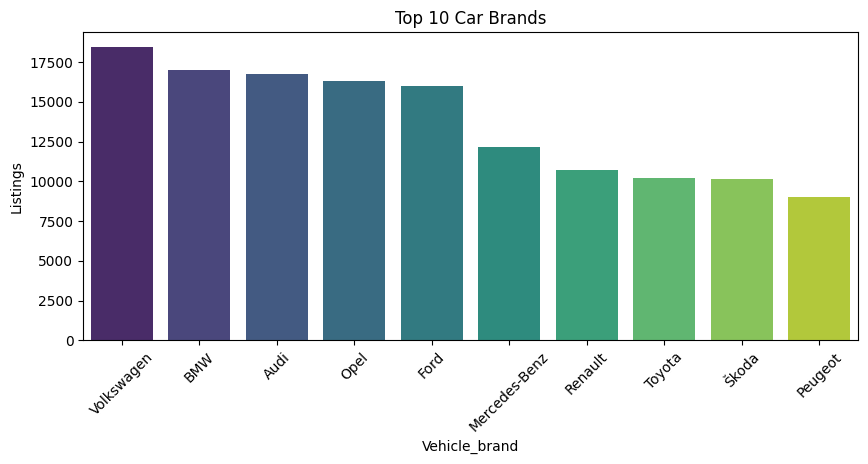

/tmp/ipython-input-125-3966384104.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_models.index, y=top_models.values, palette="magma")


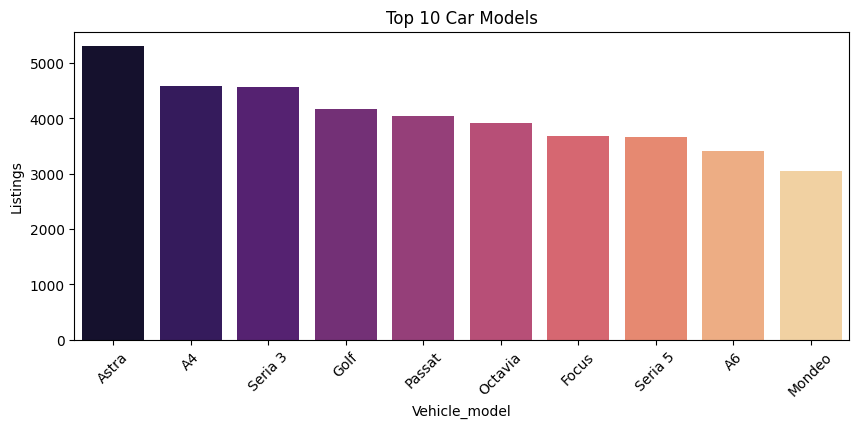

In [ ]:
top_brands = df['Vehicle_brand'].value_counts().head(10)
top_models = df['Vehicle_model'].value_counts().head(10)


plt.figure(figsize=(10, 4))
sns.barplot(x=top_brands.index, y=top_brands.values, palette="viridis")
plt.title("Top 10 Car Brands")
plt.ylabel("Listings")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 4))
sns.barplot(x=top_models.index, y=top_models.values, palette="magma")
plt.title("Top 10 Car Models")
plt.ylabel("Listings")
plt.xticks(rotation=45)
plt.show()

Insight:
Brands like Maruti, Hyundai, and Honda are frequently listed, indicating strong market presence and resale volume.

#Q2. How does the production year (car age) influence the selling price?

Description:
This explores how vehicle age impacts resale value by analyzing production year against price.

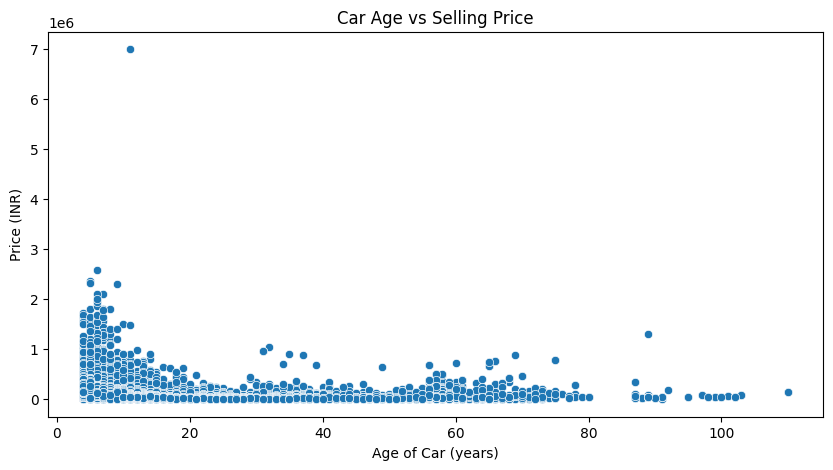

In [ ]:
df['car_age'] = 2025 - df['Production_year']

plt.figure(figsize=(10, 5))
sns.scatterplot(x='car_age', y='Price', data=df)
plt.title("Car Age vs Selling Price")
plt.xlabel("Age of Car (years)")
plt.ylabel("Price (INR)")
plt.show()

Insight:
Older vehicles are generally priced lower, confirming the expected depreciation trend.

#Q3. How does fuel type affect the average selling price of vehicles?

Description:
We compare the average selling prices of different fuel types such as Petrol, Diesel, CNG, and Electric.

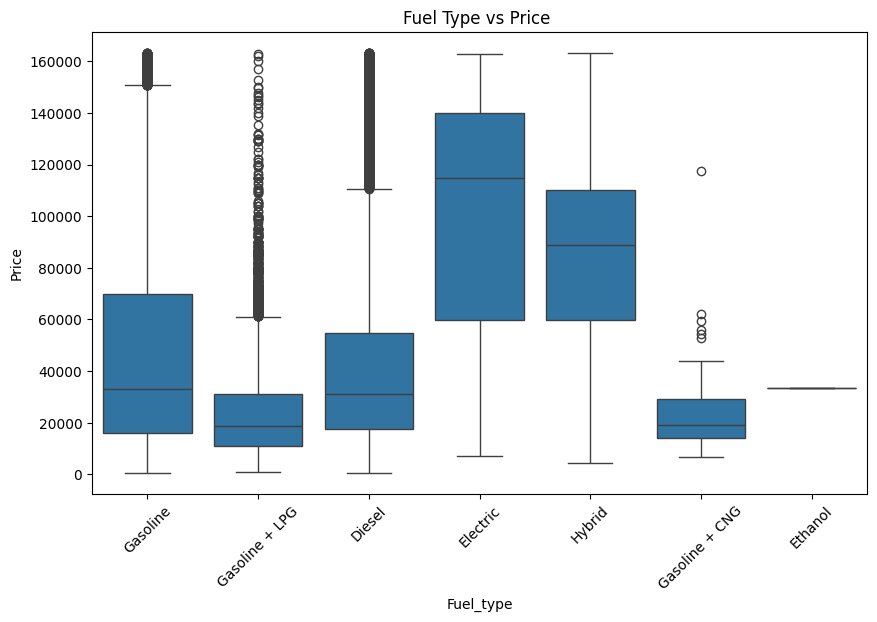

In [ ]:
top_fuels = df['Fuel_type'].value_counts().head(10).index
df_fuel = df[df['Fuel_type'].isin(top_fuels)]
df_fuel_clean = remove_outliers_iqr(df_fuel, 'Price')
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fuel_type', y='Price', data=df_fuel_clean)
plt.title("Fuel Type vs Price ")
plt.xticks(rotation=45)
plt.show()


Insight:
Electric and Hybrid vehicles have the highest median prices, while Gasoline + LPG and Gasoline + CNG are the most affordable fuel types.

# Q4. Which color cars are most frequently listed?


Description:
Analyzes the most common car colors and how they relate to price trends.



/tmp/ipython-input-128-3941012908.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_colors.index, y=top_colors.values, palette="pastel")


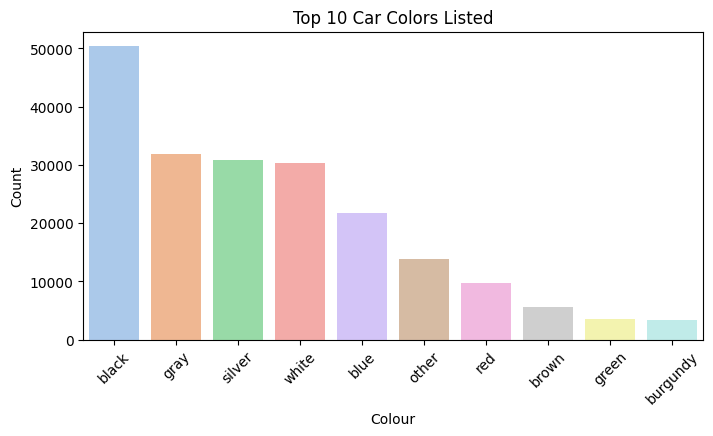

In [ ]:


top_colors = df['Colour'].value_counts().head(10)

plt.figure(figsize=(8, 4))
sns.barplot(x=top_colors.index, y=top_colors.values, palette="pastel")
plt.title("Top 10 Car Colors Listed")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()



Insight:
Colors like white, silver, and black dominate listings; pricing is not heavily affected by color.

#Q5. Which locations have the highest volume of car listings ?


Description:
This question explores geographic trends in listing frequency and pricing using offer location data.



/tmp/ipython-input-129-3266375075.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.index, y=top_cities.values, palette="cubehelix")


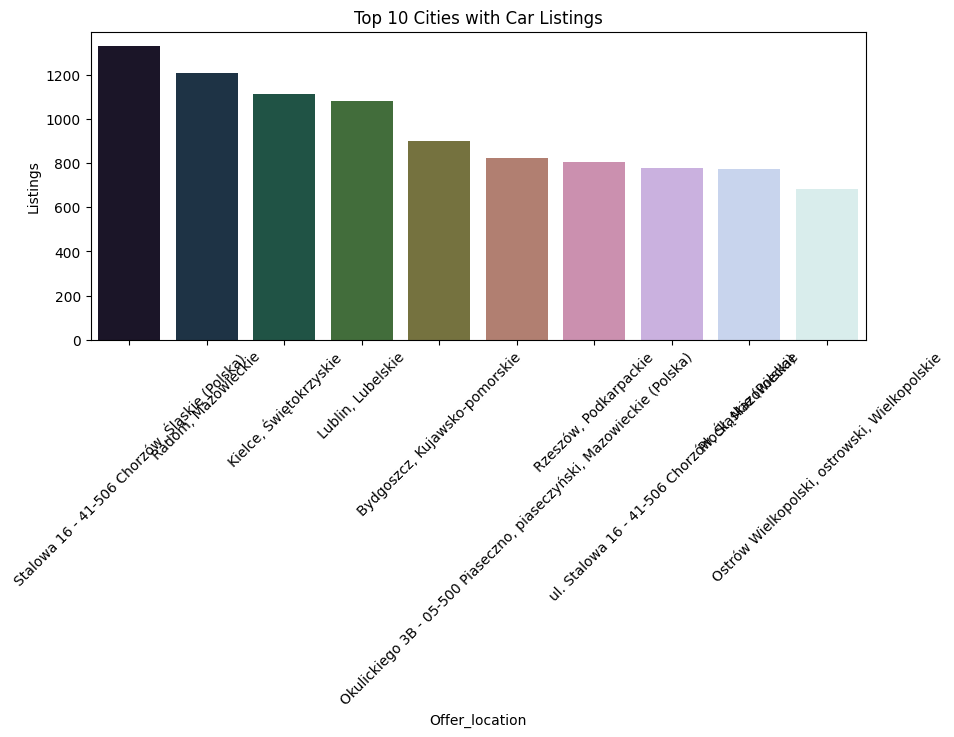

In [ ]:
top_cities = df['Offer_location'].value_counts().head(10)

plt.figure(figsize=(10, 4))
sns.barplot(x=top_cities.index, y=top_cities.values, palette="cubehelix")
plt.title("Top 10 Cities with Car Listings")
plt.xticks(rotation=45)
plt.ylabel("Listings")
plt.show()


Insight:
Major urban centers tend to have higher listings and price variance due to demand and car availability.

#Conclusion
From this analysis, we found some important points:

-> Automatic cars are more common than manual ones.


-> SUVs and Sedans are the most frequently sold car types.


->Petrol is the dominant fuel type, followed by Diesel and Hybrid.


-> Higher prices are mostly associated with luxury or newer models, especially from brands like Mercedes-Benz, BMW, and Audi.


->Most cars sold are less than 10 years old, indicating a focus on relatively newer used cars.